# 18기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [21]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.isnull().sum()
#결측값은 존재하지 않는다

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


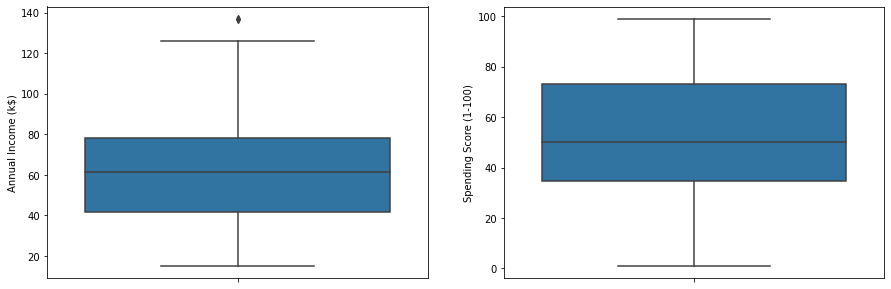

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")
plt.subplot(1,2,2)
sns.boxplot(data=df,y="Spending Score (1-100)")
plt.show()

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


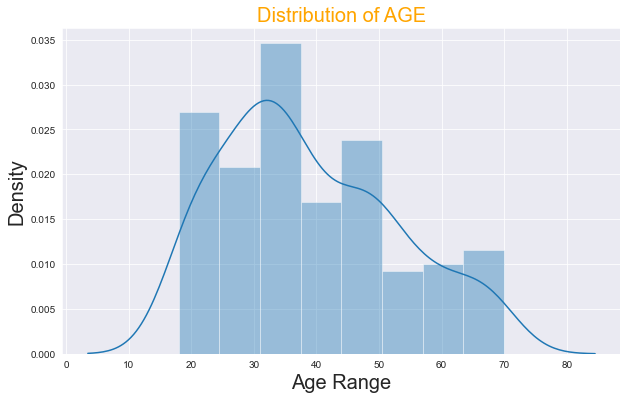

In [6]:
# Checking Age Distribution

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df.Age)
plt.title("Distribution of AGE", fontsize=20, color="orange")
plt.xlabel("Age Range", fontsize=20)
plt.ylabel("Density", fontsize=20)

plt.show()

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


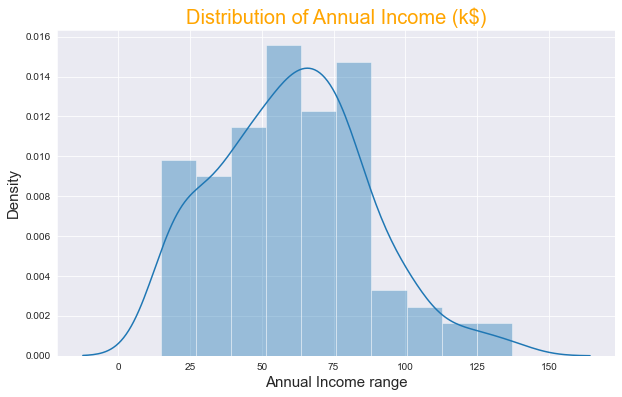

In [7]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df["Annual Income (k$)"])
plt.title("Distribution of Annual Income (k$)", fontsize=20, color="orange")
plt.xlabel("Annual Income range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


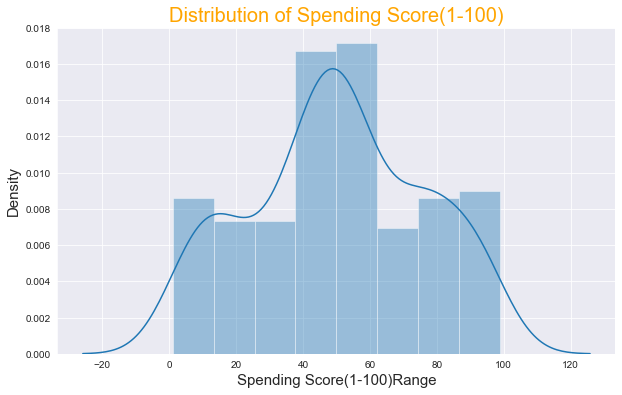

In [8]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df["Spending Score (1-100)"])
plt.title("Distribution of Spending Score(1-100)", fontsize=20, color="orange")
plt.xlabel("Spending Score(1-100)Range", fontsize=15)
plt.ylabel("Density", fontsize=15)

plt.show()

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


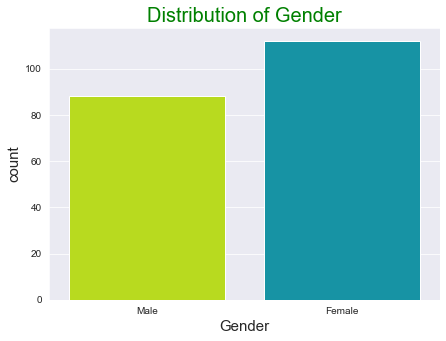

In [9]:
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')
plt.title("Distribution of Gender",fontsize=20, color="green")
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Gender, palette="nipy_spectral_r")
plt.show()

In [10]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [22]:
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

### clustering

### 그룹을 2개로

In [24]:
k_means = KMeans(n_clusters=2)
k_means.fit(df)

KMeans(n_clusters=2)

In [25]:
centers = k_means.cluster_centers_

centers

array([[ 0.44705882, 28.95294118, 62.17647059, 73.62352941],
       [ 0.43478261, 46.16521739, 59.36521739, 32.88695652]])

In [32]:
df['label'] = k_means.labels_

In [36]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'label'],
      dtype='object')

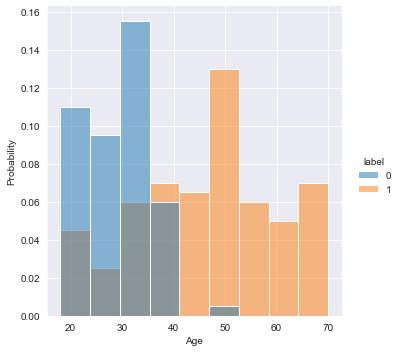

In [39]:
sns.set_style("darkgrid")
sns.displot(df, x="Age", hue="label", stat="probability")

나이가 20~40은 label이 0으로 분류되고 20~70은 1으로 분류되었다

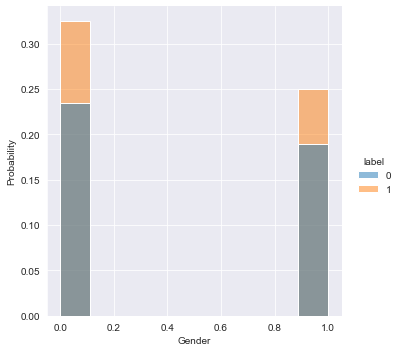

In [40]:
sns.set_style("darkgrid")
sns.displot(df, x="Gender", hue="label", stat="probability")

성별에서는 0으로 분류된 수가 더 많다

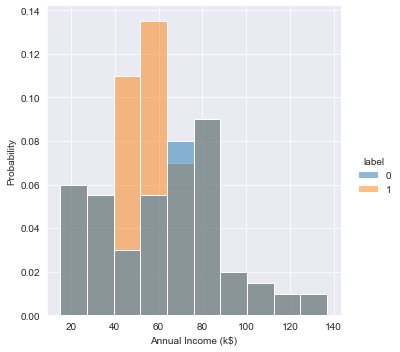

In [41]:
sns.set_style("darkgrid")
sns.displot(df, x="Annual Income (k$)", hue="label", stat="probability")

Annual Income (k$)은 그룹을 분류하는데 큰 영향을 안 미치는 것 같다

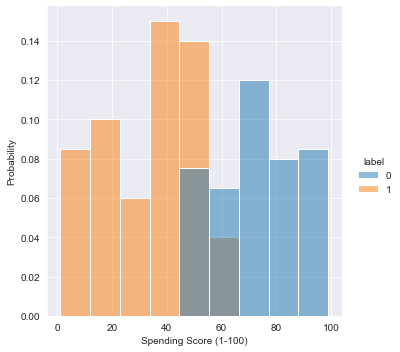

In [42]:
sns.set_style("darkgrid")
sns.displot(df, x="Spending Score (1-100)", hue="label", stat="probability")

spendint score 0~60인 경우에는 1로 분류, 50~100인 경우 0으로 분류

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


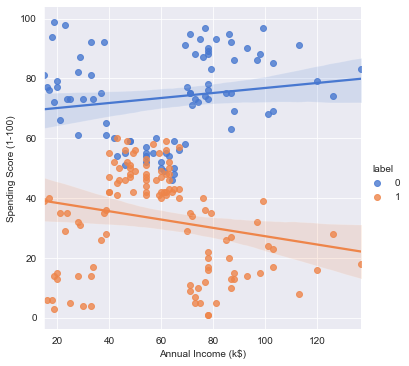

In [45]:
sns.set_palette("muted")
sns.lmplot('Annual Income (k$)','Spending Score (1-100)',data=df,hue='label')

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


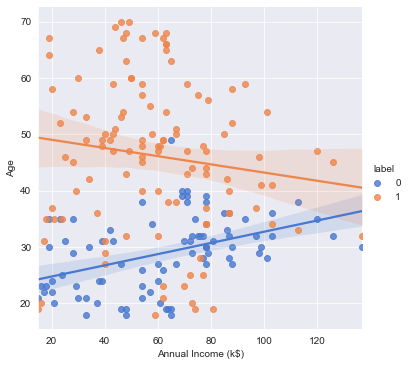

In [46]:
sns.set_palette("muted")
sns.lmplot('Annual Income (k$)','Age',data=df,hue='label')

C:\Users\rhskr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


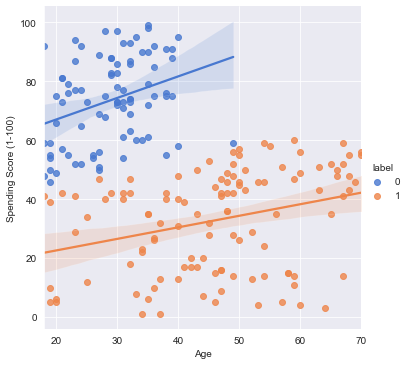

In [47]:
sns.set_palette("muted")
sns.lmplot('Age','Spending Score (1-100)',data=df,hue='label')

Age가 20 ~ 70이고 spending score가 60이하라면 1로 구분되고
Age가 0 ~40이고 spending score가 50 이상이면 0으로 구분된다

2개의 그룹으로 분류될때 나눠지는 주요 기점은 나이가 40이하인지, spending score가 50 이상/이하인지 같다

### 그룹을 3개로

In [48]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)

KMeans(n_clusters=3)

In [52]:
k_means.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [53]:
df_3 = df.copy()
df_3['label'] = k_means.labels_
df_3['label'].value_counts()

2    123
0     39
1     38
Name: label, dtype: int64

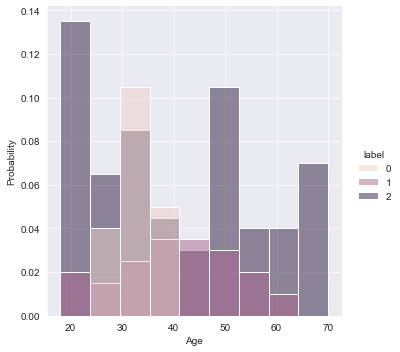

In [55]:
sns.set_style("darkgrid")
sns.displot(df_3, x="Age", hue="label", stat="probability")

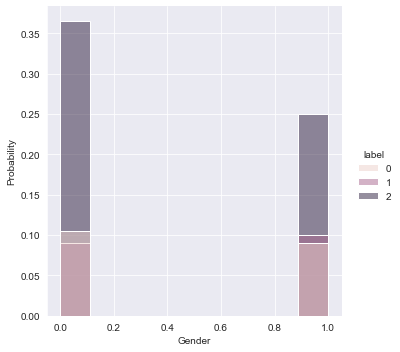

In [57]:
sns.set_style("darkgrid")
sns.displot(df_3, x="Gender", hue="label", stat="probability")

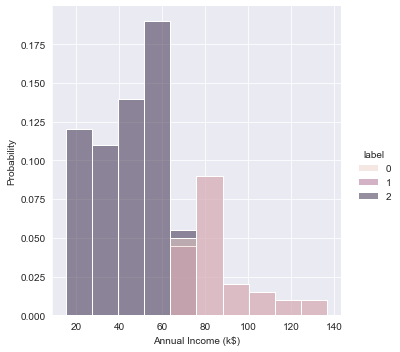

In [58]:
sns.set_style("darkgrid")
sns.displot(df_3, x="Annual Income (k$)", hue="label", stat="probability")

그룹을 3개로 나눌 때는 나누는 의미가 크게 없어보인다